In [2]:
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale,robust_scale,minmax_scale,maxabs_scale
import datetime
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew

ImportError: No module named numpy

# 데이터 파악 및 누락값 채우기

In [54]:
data='./training.csv'
train=pd.read_csv(data,header=0)
train=pd.DataFrame(data=train)

In [ ]:
train

In [55]:
train=train.drop(["VehYear"],axis=1)
train=train.drop(["RefId"],axis=1)
train=train.drop(["Model"],axis=1)
train=train.drop(["Trim"],axis=1)
train=train.drop(["SubModel"],axis=1)
train=train.drop(["WheelTypeID"],axis=1)
train=train.drop(["PRIMEUNIT"],axis=1)
train=train.drop(["AUCGUART"],axis=1)
train=train.drop(["VNZIP1"],axis=1)
train=train.drop(["PurchDate"],axis=1)
train=train.drop(["BYRNO"],axis=1)

In [56]:
train.loc[[15906, 24567, 24578, 70432, 70434, 70437, 70445, 70446, 70450],["Transmission"]]="AUTO"

train.dropna(subset=["Color"], inplace=True)
train.dropna(subset=["MMRAcquisitionAuctionAveragePrice"], inplace=True)
train.dropna(subset=["MMRCurrentAuctionAveragePrice"], inplace=True)
train.dropna(subset=["Size"], inplace=True)
train.loc[train["WheelType"].isnull(),"WheelType"]="Alloy"
train.loc[train['Transmission']=="Manual","Transmission"]="MANUAL"

In [57]:
numerical_features = train.select_dtypes(include=["float64","int64","bool"]).columns.values
categorical_features = train.select_dtypes(include=["object"]).columns.values

In [58]:
index=[0,12]
numerical_features=np.delete(numerical_features,index)
categorical_features=np.append(categorical_features,["IsBadBuy"])
categorical_features=np.append(categorical_features,["IsOnlineSale"])

# 데이터 분포 파악및 공분산성을 통해 데이터 차원축소

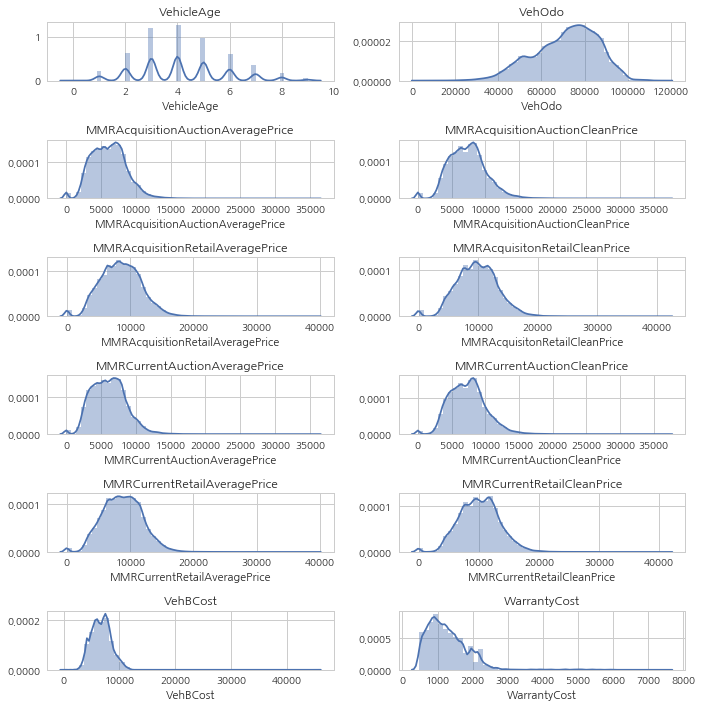

In [7]:


lst2=list(train[numerical_features])


plt.figure(figsize=(10,10))
for i in range(12):
   
    plt.subplot(6,2,i+1)
    sns.distplot(train[lst2[i]])
    plt.title(lst2[i])
plt.tight_layout()
plt.show()




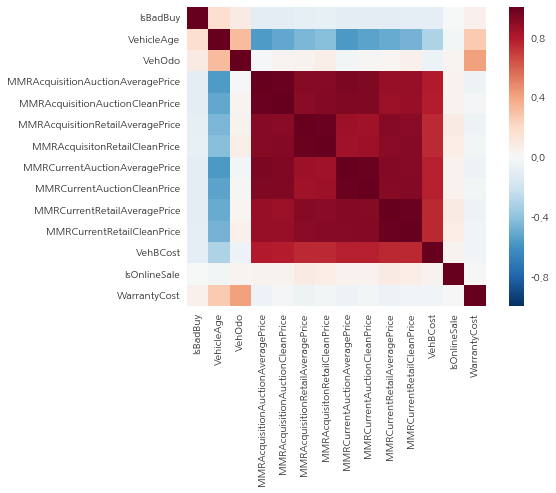

In [59]:
x_cor=train.corr()
sns.heatmap(x_cor,square=True)
plt.show()

In [60]:
num_col=['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                        'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                        'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                        'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

In [61]:
train_x1=train.copy()
train_y1=train["IsBadBuy"].copy()
train_x1["AuctionAve"]=sum(train[a] for a in num_col)/len(num_col)
train_x1=train.drop(num_col,axis=1)
    

In [11]:

print(train_x1.shape)
train_x1

(72659, 15)


,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,FL,7100.0,0,1113
1,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,FL,7600.0,0,1053
2,0,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,FL,4900.0,0,1389
3,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,FL,4100.0,0,630
4,0,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,FL,4000.0,0,1020
5,0,ADESA,5,MITSUBISHI,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,FL,5600.0,0,594
6,0,ADESA,5,KIA,BLACK,AUTO,Covers,65328,OTHER ASIAN,MEDIUM,OTHER,FL,4200.0,0,533
7,0,ADESA,4,FORD,WHITE,AUTO,Covers,65805,AMERICAN,MEDIUM,FORD,FL,4500.0,0,825
8,0,ADESA,2,KIA,BLACK,AUTO,Covers,49921,OTHER ASIAN,MEDIUM,OTHER,FL,5600.0,0,482
9,0,ADESA,2,FORD,RED,AUTO,Alloy,84872,AMERICAN,LARGE,FORD,FL,7700.0,0,1633


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

category_col=["Auction","Make","Color","Transmission","WheelType","Nationality","Size","TopThreeAmericanName","VNST","IsOnlineSale"]

def change_category(df):
    le=LabelEncoder()
    le.fit(df)
    a=le.transform(df)
    
    return a

    

In [13]:
train_x1

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,FL,7100.0,0,1113
1,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,FL,7600.0,0,1053
2,0,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,FL,4900.0,0,1389
3,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,FL,4100.0,0,630
4,0,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,FL,4000.0,0,1020
5,0,ADESA,5,MITSUBISHI,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,FL,5600.0,0,594
6,0,ADESA,5,KIA,BLACK,AUTO,Covers,65328,OTHER ASIAN,MEDIUM,OTHER,FL,4200.0,0,533
7,0,ADESA,4,FORD,WHITE,AUTO,Covers,65805,AMERICAN,MEDIUM,FORD,FL,4500.0,0,825
8,0,ADESA,2,KIA,BLACK,AUTO,Covers,49921,OTHER ASIAN,MEDIUM,OTHER,FL,5600.0,0,482
9,0,ADESA,2,FORD,RED,AUTO,Alloy,84872,AMERICAN,LARGE,FORD,FL,7700.0,0,1633


In [14]:
c=pd.get_dummies(train_x1,columns=category_col)

In [15]:
train_x2=c

In [71]:
def convert_nominal_cols(df):
    '''
    This function converts nominal cols to integers
    Takes the unique values into an array and fills in an array index
    '''

    for col in categorical_features:
        listOfItems = list(df[col].unique())
        df[col] = df[col].map(lambda x : listOfItems.index(x))

    return df

In [72]:
train_x4=train_x1.copy()

In [73]:
train_x4=convert_nominal_cols(train_x4)

# 데이터 샘플링

In [16]:
good_train=train_x2.loc[train_x2["IsBadBuy"]==0]
bad_train=train_x2.loc[train_x2["IsBadBuy"]==1]
good_index=train_x2[train_x2["IsBadBuy"]==0].index
w=np.random.choice(good_index,8943,replace=False)
sample_good=train_x2.loc[w]
train_x2=pd.concat([sample_good,bad_train],ignore_index=True)


In [17]:
train_x2.shape

(17886, 121)

In [52]:
train_x1

,const,VehicleAge,VehOdo,VehBCost,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,...,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV,IsOnlineSale_0,IsOnlineSale_1
3410,1.0,2,84940,10010.0,1503,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5019,1.0,3,49790,7090.0,482,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12079,1.0,5,86448,5200.0,1243,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3318,1.0,4,65783,6985.0,1703,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17799,1.0,5,109260,3905.0,1130,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10679,1.0,9,81739,4800.0,1153,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
16389,1.0,7,71593,3695.0,1455,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16676,1.0,8,78264,5540.0,1338,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8406,1.0,7,42223,5300.0,1416,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10215,1.0,2,55039,8300.0,920,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [74]:
good_train1=train_x4.loc[train_x4["IsBadBuy"]==0]
bad_train1=train_x4.loc[train_x4["IsBadBuy"]==1]
good_index1=train_x4[train_x4["IsBadBuy"]==0].index
w=np.random.choice(good_index1,8943,replace=False)
sample_good1=train_x4.loc[w]
train_x3=pd.concat([sample_good1,bad_train1],ignore_index=True)


In [75]:
train_x3

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,0,3,9,0,0,1,43280,1,0,1,15,5625.0,0,975
1,0,1,5,2,11,0,0,81102,1,4,2,21,5155.0,0,1633
2,0,2,7,13,0,0,0,84652,1,0,3,11,6475.0,0,894
3,0,2,4,6,1,0,1,67707,2,0,0,10,8040.0,0,630
4,0,2,7,11,2,0,0,84601,0,5,0,10,6985.0,0,1413
5,0,2,4,2,1,0,0,96250,1,1,2,10,10970.0,0,909
6,0,2,3,9,3,0,1,80738,1,0,1,15,6800.0,0,1373
7,0,2,3,8,7,1,1,61837,1,0,3,33,6005.0,0,728
8,0,2,4,8,2,1,1,66781,1,0,3,21,4840.0,0,728
9,0,2,5,7,1,0,1,68245,1,2,3,21,4425.0,0,1020


# 검증셋 나누기

In [18]:
from sklearn.cross_validation import train_test_split
def split_train_test(df):
    temp = df.drop("IsBadBuy", axis=1)
    train_X, test_X, train_Y, test_Y = train_test_split(temp, df.IsBadBuy,
                                                        test_size=0.3, random_state=4531)
    train_X = pd.DataFrame(train_X, columns=df.columns[1:])
    test_X = pd.DataFrame(test_X, columns=df.columns[1:])
    train_Y = pd.DataFrame(train_Y, columns=['IsBadBuy'])
    test_Y = pd.DataFrame(test_Y, columns=['IsBadBuy'])
   
    scale(train_X)
    scale(test_X)

    return train_X, test_X, train_Y, test_Y

/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
from sklearn.cross_validation import train_test_split
def split_train_test2(df):
    temp = df.drop("IsBadBuy", axis=1)
    train_X, test_X, train_Y, test_Y = train_test_split(temp, df.IsBadBuy,
                                                        test_size=0.3, random_state=4531)
    train_X = pd.DataFrame(train_X, columns=df.columns[1:])
    test_X = pd.DataFrame(test_X, columns=df.columns[1:])
    train_Y = pd.DataFrame(train_Y, columns=['IsBadBuy'])
    test_Y = pd.DataFrame(test_Y, columns=['IsBadBuy'])
   
   

    return train_X, test_X, train_Y, test_Y

In [76]:
x_ctrain,x_ctest,y_ctrain,y_ctest=split_train_test2(train_x3)

In [20]:
x_train

,VehicleAge,VehOdo,VehBCost,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,...,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV,IsOnlineSale_0,IsOnlineSale_1
3410,2,84940,10010.0,1503,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5019,3,49790,7090.0,482,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12079,5,86448,5200.0,1243,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3318,4,65783,6985.0,1703,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17799,5,109260,3905.0,1130,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10679,9,81739,4800.0,1153,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
16389,7,71593,3695.0,1455,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16676,8,78264,5540.0,1338,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8406,7,42223,5300.0,1416,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10215,2,55039,8300.0,920,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
y_train=np.array(y_train)
y_train=y_train.reshape(12520,)
y_train.shape
y_test=np.array(y_test)
y_test=y_test.reshape(5366,)
y_test.shape

(5366,)

# 1. 로지스틱 분석

In [4]:
import statsmodels.api as sm
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression

train_x1=sm.add_constant(x_train)
logreg=LogisticRegression()

predicted = cross_validation.cross_val_predict(logreg, train_x1, y_train, cv=10)
scores = cross_validation.cross_val_score(logreg, train_x1, y_train, cv=10)
print (metrics.classification_report(y_train, predicted))
print(metrics.accuracy_score(y_train, predicted))


print('average score: {}'.format(scores.mean()))


ImportError: No module named statsmodels.api

In [5]:
logreg.fit(train_x1,y_train)
test_x1=sm.add_constant(x_test)
pred=logreg.predict(test_x1)
print(metrics.accuracy_score(y_test, pred)) 

NameError: name 'logreg' is not defined

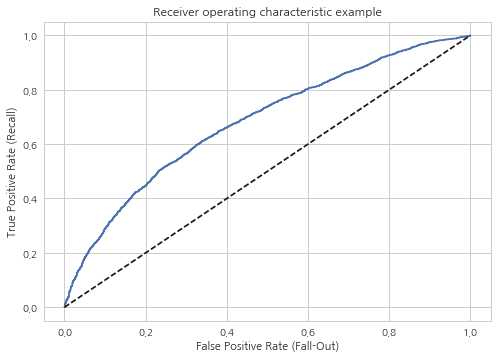

In [26]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,logreg.decision_function(test_x1))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()


# 2. 랜덤 포레스트

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0).fit(x_train, y_train)

In [43]:
x_train.columns

Index([u'VehicleAge', u'VehOdo', u'VehBCost', u'WarrantyCost',
       u'Auction_ADESA', u'Auction_MANHEIM', u'Auction_OTHER', u'Make_ACURA',
       u'Make_BUICK', u'Make_CADILLAC',
       ...
       u'VNST_PA', u'VNST_SC', u'VNST_TN', u'VNST_TX', u'VNST_UT', u'VNST_VA',
       u'VNST_WA', u'VNST_WV', u'IsOnlineSale_0', u'IsOnlineSale_1'],
      dtype='object', length=120)

In [45]:
y_pred=tree1.predict(x_test)

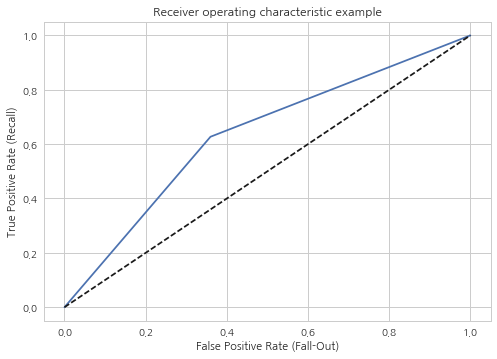

In [46]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [47]:
predicted = cross_validation.cross_val_predict(DecisionTreeClassifier(), x_train, y_train, cv=10)
scores = cross_validation.cross_val_score(DecisionTreeClassifier(), x_train, y_train, cv=10)
print (metrics.classification_report(y_train, predicted))
print(metrics.accuracy_score(y_train, predicted))


print('average score: {}'.format(scores.mean()))


             precision    recall  f1-score   support

          0       0.57      0.56      0.56      6283
          1       0.56      0.57      0.56      6237

avg / total       0.56      0.56      0.56     12520

0.563418530351
average score: 0.562378175962


In [48]:
import StringIO
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(classifier):
    dot_buf = StringIO.StringIO() 
    export_graphviz(classifier, out_file=dot_buf, feature_names=x_train.columns)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

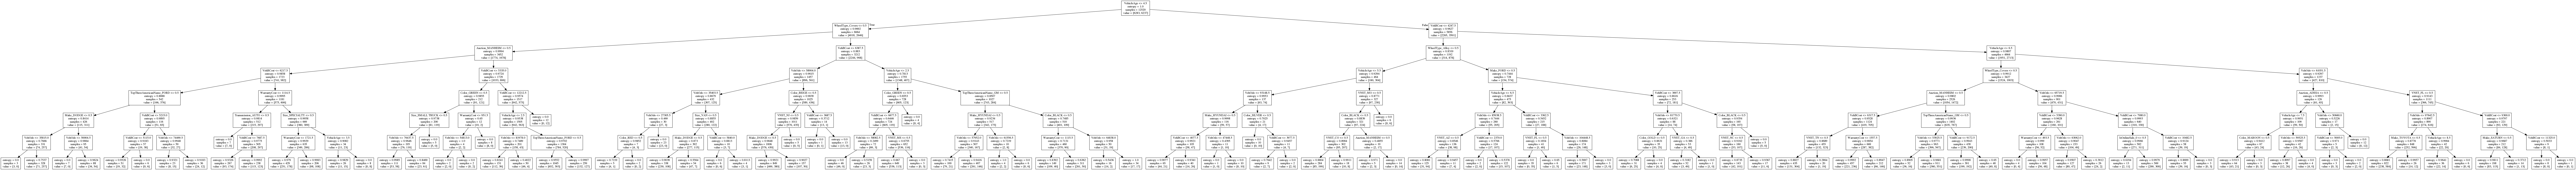

In [49]:
draw_decision_tree(tree1)

# PCA를 통한 차원축소후 로지스틱분석

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca1=PCA()
train_pca=pca1.fit(x_train)


In [ ]:
pca1.n_components_

In [ ]:
normalized_eigenvalues = train_pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(normalized_eigenvalues)

plt.scatter(x = range(len(normalized_eigenvalues)),
    y = normalized_eigenvalues,
    marker = 'o',
    s = 50)

plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
# plt.xlim(-1, len(normalized_eigenvalues))
plt.xlim(-1, 200)
plt.ylim(-.01, max(normalized_eigenvalues) + .01)
plt.style.use('ggplot')
plt.show()

In [ ]:
cumulated_normalized_eigenvalues = np.cumsum(normalized_eigenvalues)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.plot(cumulated_normalized_eigenvalues)

In [ ]:
pca1 = PCA(n_components = 4).fit(x_train)

In [ ]:
pca_train=pca1.transform(x_train)

In [ ]:
pca_train

In [ ]:

logreg=LogisticRegression()

predicted = cross_validation.cross_val_predict(logreg, pca_train, y_train, cv=10)
scores = cross_validation.cross_val_score(logreg, pca_train, y_train, cv=10)
print metrics.classification_report(y_train, predicted) 
print(metrics.accuracy_score(y_train, predicted))


print('average score: {}'.format(scores.mean()))

In [ ]:
pca =PCA(n_components = 4).fit(x_test)
pca_test = pca.transform(x_test)

In [ ]:

logreg=LogisticRegression()

predicted = cross_validation.cross_val_predict(logreg, pca_test, y_test, cv=10)
scores = cross_validation.cross_val_score(logreg, pca_test, y_test, cv=10)
print metrics.classification_report(y_test, predicted) 
print(metrics.accuracy_score(y_test, predicted))


print('average score: {}'.format(scores.mean()))

In [ ]:
logreg.fit(pca_train,y_train)

pred=logreg.predict(pca_test)
print(metrics.accuracy_score(y_test, pred)) 

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict(pca_test))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0).fit(pca_train, y_train)

In [ ]:
y_pred=tree1.predict(pca_test)

In [ ]:
decisiontree=DecisionTreeClassifier()

predicted = cross_validation.cross_val_predict(decisiontree, pca_train, y_train, cv=10)
scores = cross_validation.cross_val_score(decisiontree, pca_train, y_train, cv=10)
print metrics.classification_report(y_train, predicted) 
print(metrics.accuracy_score(y_train, predicted))


print('average score: {}'.format(scores.mean()))

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

# svm을 통한 분석

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel="Linear").fit(x_ctrain,y_ctrain)
y_predict_svc=svc.predict(x_ctest)
from sklearn.metrics import classification_report
print (classification_report(y_ctest,y_predict_svc))


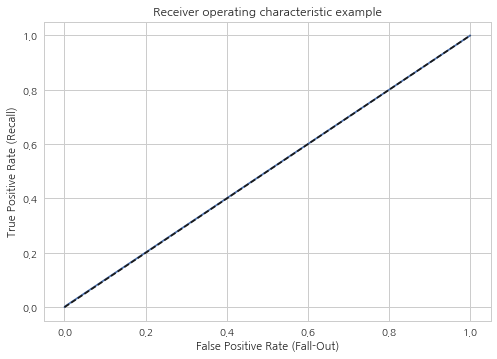

In [97]:
fpr,tpr,thresholds=roc_curve(y_ctest,y_predict_svc)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [91]:
from sklearn.tree import DecisionTreeClassifier

tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0).fit(x_ctrain, y_ctrain)

In [94]:
y_predict=tree3.predict(x_ctrain)

print (classification_report(y_ctrain,y_predict))

             precision    recall  f1-score   support

          0       0.66      0.65      0.66      6283
          1       0.65      0.66      0.66      6237

avg / total       0.66      0.66      0.66     12520



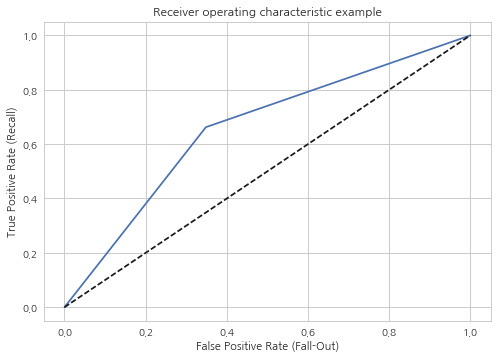

In [95]:
fpr,tpr,thresholds=roc_curve(y_ctrain,y_predict)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [92]:
y_predict_decision=tree3.predict(x_ctest)
print (classification_report(y_ctest,y_predict_decision))

             precision    recall  f1-score   support

          0       0.62      0.62      0.62      2660
          1       0.62      0.62      0.62      2706

avg / total       0.62      0.62      0.62      5366



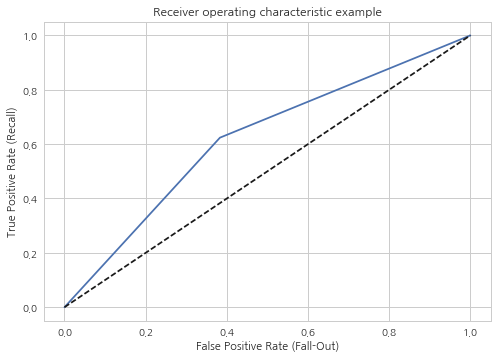

In [93]:
fpr,tpr,thresholds=roc_curve(y_ctest,y_predict_decision)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_ctrain,y_ctrain)